<a href="https://colab.research.google.com/github/SunkaraboinaPraveenKumar/Machine_Learning_Projects/blob/main/Copy_of_BuildingLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression

Y=wX+b

Y-->Dependent Variable

X-->Independent Variable

w-->Weight

b-->Bias

Gradient Descent:

Gradient Descent is an model Optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model

w=w-L*dw

b=b-L*db

learning rate:

Learning Rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving towards a minimum of a loss function.

In [ ]:
import numpy as np
# import Lin_Reg_Model as lin_reg

In [ ]:
# Linear Regression

In [ ]:
import numpy as np # type: ignore
class Linear_Regression():
  #initializing the hyper parameters (learning rate and no of iterations)
  def __init__(self,learning_rate,no_of_iterations):
    self.learning_rate=learning_rate
    self.no_of_iterations=no_of_iterations
  def fit(self,X,Y):
    #no of training examples and no of features
    self.m,self.n = X.shape #number of rows and columns
    #initiating the weight and bias of the model
    self.w=np.zeros(self.n) #weights may be associated with mmany features
    self.b=0
    self.X=X
    self.Y=Y

    #implementing the Gradient Descent

    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self):
    Y_prediction=self.predict(self.X)
    #calculate gradients
    dw=-(2*(self.X.T).dot(self.Y-Y_prediction))/self.m

    db=-2*(np.sum(self.Y-Y_prediction))/self.m

    #updating the weights
    self.w=self.w-self.learning_rate*dw
    self.b=self.b-self.learning_rate*db

  def predict(self,X):
    return X.dot(self.w)+self.b

In [ ]:
# from sklearn.linear_model import LogisticRegression
# model=LogisticRegression()

Using Linear Regression model for prediction

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Data Pre - Preprocessing



In [ ]:
salary_data=pd.read_csv('/content/salary_data.csv')

In [ ]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [ ]:
#number of rows and columns
salary_data.shape

(30, 2)

Splitting data into features and target

In [ ]:
X=salary_data.iloc[:,:-1].values
Y=salary_data.iloc[:,1].values
print(X)
print(Y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


Splitting the data into training and test data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(30, 1) (20, 1) (10, 1)


Training the Linear Regression

In [ ]:
model=Linear_Regression(learning_rate=0.005,no_of_iterations=10000)

In [ ]:
model.fit(X_train,Y_train)

In [ ]:
#printing the parameters weights and bias values
print('Weight= ',model.w[0])
print('Bias= ',model.b)

Weight=  9512.945003508794
Bias=  23707.81313306434


salary=9514(experience)+23697

Predict the salary value for test data

In [ ]:
test_data_prediction=model.predict(X_test)

In [ ]:
print(test_data_prediction)

[ 36074.64163763  34172.05263692  66516.06564885  58905.70964605
  91249.72265798  80785.48315412 101713.96216184  52246.64814359
  42733.70314008  88395.83915692]


Visualizing the predicted and actual values

Text(0.5, 1.0, 'Work Experience Vs Salary')

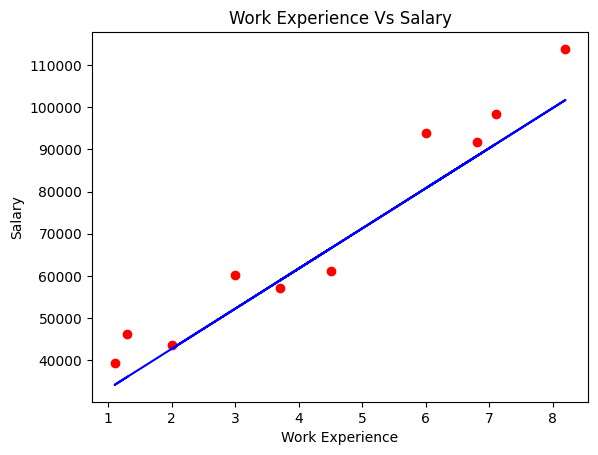

In [ ]:
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,test_data_prediction,color='blue')
plt.xlabel("Work Experience")
plt.ylabel("Salary")
plt.title("Work Experience Vs Salary")